Pandas Data Aggregation and Operation

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_excel("Documents\Grouping with combine list.xlsx", header = None, col_index= 0)

In [3]:
Data = Data.drop([0,1]).drop([0], axis =1)[[1,2,4]].dropna().rename(columns ={1:"Date", 2:"product", 4:"Sales"}).drop(2).set_index("Date")

In [4]:
Data  

,product,Sales
Date,,
2020-02-29,Quad,1379.01
2020-02-25,Carlota,1018.27
2020-02-02,Bellen,2162.58
2020-02-21,Quad,73.39
2020-02-19,Sunshine,2205.1
2020-02-23,Sunshine,112.79
2020-02-27,Carlota,1171.23
2020-02-12,Carlota,617.22
2020-02-12,Bellen,937.34


In [5]:
DataGroup = Data["Sales"].groupby(Data["product"])  # here we are grouping the Data by product column by their sales

In [6]:
DataGroup.sum() #  Summing all the group

product
Bellen      3596.74
Carlota     7958.90
Quad        6658.49
Sunshine    6658.49
Name: Sales, dtype: float64

In [7]:
Data1 = pd.DataFrame({"Product": ["Samsung", "Iphone", "Samsung", "Tecno", "Samsung", "Infinix"]*3,
                     "Price": np.linspace(150,2000,18),
                     "SalesPerson": ["Wale", "Segun", "Fred", "Kunle", "Gbaja", "Yusuf"]*3})

In [8]:
Data1.groupby(["Product", "SalesPerson"]).count()

Price
Product SalesPerson       
Infinix Yusuf            3
Iphone  Segun            3
Samsung Fred             3
        Gbaja            3
        Wale             3
Tecno   Kunle            3

In [9]:
Data1[Data1["Product"] == "Samsung"]

,Product,Price,SalesPerson
0,Samsung,150.000000,Wale
2,Samsung,367.647059,Fred
4,Samsung,585.294118,Gbaja
6,Samsung,802.941176,Wale
8,Samsung,1020.588235,Fred
10,Samsung,1238.235294,Gbaja
12,Samsung,1455.882353,Wale
14,Samsung,1673.529412,Fred
16,Samsung,1891.176471,Gbaja


In [10]:
pd.crosstab(Data1["Product"], Data1["SalesPerson"])



SalesPerson,Fred,Gbaja,Kunle,Segun,Wale,Yusuf
Product,,,,,,
Infinix,0,0,0,0,0,3
Iphone,0,0,0,3,0,0
Samsung,3,3,0,0,3,0
Tecno,0,0,3,0,0,0


In [11]:
Data1["Price"].groupby(Data1["Product"]).mean()

Product
Infinix    1347.058824
Iphone      911.764706
Samsung    1020.588235
Tecno      1129.411765
Name: Price, dtype: float64

In [12]:
pd.DataFrame(Data1["Price"].groupby(Data1["Product"]).mean())  #  mOving the group Data to DataFrame

,Price
Product,
Infinix,1347.058824
Iphone,911.764706
Samsung,1020.588235
Tecno,1129.411765


In [13]:
Data1.groupby(["SalesPerson", "Product"]).sum()

,,Price
SalesPerson,Product,
Fred,Samsung,3061.764706
Gbaja,Samsung,3714.705882
Kunle,Tecno,3388.235294
Segun,Iphone,2735.294118
Wale,Samsung,2408.823529
Yusuf,Infinix,4041.176471


In [14]:
# we can also group by multiple columns

In [15]:
new = Data1["Price"].groupby([Data1["Product"], Data1["SalesPerson"]]).sum()
new

Product  SalesPerson
Infinix  Yusuf          4041.176471
Iphone   Segun          2735.294118
Samsung  Fred           3061.764706
         Gbaja          3714.705882
         Wale           2408.823529
Tecno    Kunle          3388.235294
Name: Price, dtype: float64

In [16]:
pd.DataFrame(new).sort_index(level=1).swaplevel(0,1)  #  moving the group Data to DataFrame

,,Price
SalesPerson,Product,
Fred,Samsung,3061.764706
Gbaja,Samsung,3714.705882
Kunle,Tecno,3388.235294
Segun,Iphone,2735.294118
Wale,Samsung,2408.823529
Yusuf,Infinix,4041.176471


In [17]:
Pivot4 = pd.DataFrame({"key": ["Microsoft", "Apple", "Google", "Tecno"]*4,
                  "Data": [3,45,23, 28]*4,
                  "worth": [23,84,38,39]*4,
                  "Net": [25,48,29,10]*4})
Pivot4

,key,Data,worth,Net
0,Microsoft,3,23,25
1,Apple,45,84,48
2,Google,23,38,29
3,Tecno,28,39,10
4,Microsoft,3,23,25
5,Apple,45,84,48
6,Google,23,38,29
7,Tecno,28,39,10
8,Microsoft,3,23,25
9,Apple,45,84,48


In [18]:
df = pd.melt(Pivot4, "key")
df

,key,variable,value
0,Microsoft,Data,3
1,Apple,Data,45
2,Google,Data,23
3,Tecno,Data,28
4,Microsoft,Data,3
5,Apple,Data,45
6,Google,Data,23
7,Tecno,Data,28
8,Microsoft,Data,3
9,Apple,Data,45


In [19]:
df["value"].groupby([df["variable"], df["key"]]).sum()  #Here is the grouping

variable  key      
Data      Apple        180
          Google        92
          Microsoft     12
          Tecno        112
Net       Apple        192
          Google       116
          Microsoft    100
          Tecno         40
worth     Apple        336
          Google       152
          Microsoft     92
          Tecno        156
Name: value, dtype: int64

In [20]:

df["value"].groupby([df["variable"], df["key"]]).sum().unstack().T

variable,Data,Net,worth
key,,,
Apple,180,192,336
Google,92,116,152
Microsoft,12,100,92
Tecno,112,40,156


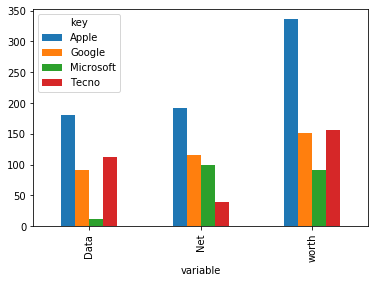

In [21]:
import matplotlib.pyplot as plt

df["value"].groupby([df["variable"], df["key"]]).sum().unstack().plot.bar() # unstacking the grouping  # Building chart

In [22]:
df["value"].groupby([df["variable"], df["key"]]).sum().unstack().T  # Transposing the Result

variable,Data,Net,worth
key,,,
Apple,180,192,336
Google,92,116,152
Microsoft,12,100,92
Tecno,112,40,156


In [23]:
# we can also group by array of the same length of the columns in the dataframe
state = np.array(["Eket", "Eket", "PH", "Kano", "Kano", "Eket"]*8)
year = np.array([2007,2020,2010,2020,2007, 2020, 2010,2010]*6)


In [24]:
df["value"].groupby([state,year]).sum().unstack()

,2007,2010,2020
Eket,54.0,244.0,570.0
Kano,74.0,157.0,292.0
PH,76.0,113.0,NaN


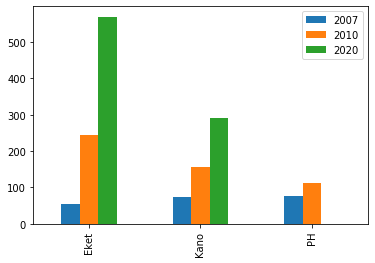

In [25]:
df["value"].groupby([state,year]).sum().unstack().plot.bar()  # passing an array and unstacking it

In [26]:
# we can pass the whole dataframe t0 group items the data

In [27]:
df.groupby("key").sum()  #  the gruoping the data by key

,value
key,
Apple,708
Google,360
Microsoft,204
Tecno,308


In [28]:
df.groupby(["variable", "key"]).sum().reset_index()

,variable,key,value
0,Data,Apple,180
1,Data,Google,92
2,Data,Microsoft,12
3,Data,Tecno,112
4,Net,Apple,192
5,Net,Google,116
6,Net,Microsoft,100
7,Net,Tecno,40
8,worth,Apple,336
9,worth,Google,152


In [29]:
df["value"].groupby(df["variable"]).sum()  # same result as above

variable
Data     396
Net      448
worth    736
Name: value, dtype: int64

In [30]:
df["Amounts"] = np.linspace(500,2000,48).round(0)

In [31]:
df

,key,variable,value,Amounts
0,Microsoft,Data,3,500.0
1,Apple,Data,45,532.0
2,Google,Data,23,564.0
3,Tecno,Data,28,596.0
4,Microsoft,Data,3,628.0
5,Apple,Data,45,660.0
6,Google,Data,23,691.0
7,Tecno,Data,28,723.0
8,Microsoft,Data,3,755.0
9,Apple,Data,45,787.0


In [32]:
Data2 = pd.read_excel("Desktop\Python Excel\Podcast2178.xlsm", sheet_name = None, header = None, names = ["product", "Date", "Sector", "Customers", "Quantity", "Revenue", "COGS", "Profit"])

In [33]:
Data2["East"]

,product,Date,Sector,Customers,Quantity,Revenue,COGS,Profit
0,East Region Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Product,Date,Sector,Customer,Quantity,Revenue,COGS,Profit
3,DEF,2017-01-02 00:00:00,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,ABC,2017-01-02 00:00:00,Healthcare,Merck,800,18552,7872,10680
...,...,...,...,...,...,...,...,...
188,XYZ,2018-08-29 00:00:00,Financial,CitiGroup,1000,25010,10220,14790
189,XYZ,2018-08-29 00:00:00,Manufacturing,Cummins Inc.,500,10380,5110,5270
190,XYZ,2018-08-30 00:00:00,Energy,Exxon,900,20664,9198,11466
191,XYZ,2018-08-30 00:00:00,Manufacturing,IBM,300,6744,3066,3678


In [34]:
df2 = Data2["East"].drop([0,1, 2])
df2

,product,Date,Sector,Customers,Quantity,Revenue,COGS,Profit
3,DEF,2017-01-02 00:00:00,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,ABC,2017-01-02 00:00:00,Healthcare,Merck,800,18552,7872,10680
5,ABC,2017-01-03 00:00:00,Manufacturing,General Motors,400,8456,3388,5068
6,DEF,2017-01-03 00:00:00,Financial,State Farm,1000,21730,9840,11890
7,XYZ,2017-01-06 00:00:00,Communications,AT&T,100,2401,1022,1379
...,...,...,...,...,...,...,...,...
188,XYZ,2018-08-29 00:00:00,Financial,CitiGroup,1000,25010,10220,14790
189,XYZ,2018-08-29 00:00:00,Manufacturing,Cummins Inc.,500,10380,5110,5270
190,XYZ,2018-08-30 00:00:00,Energy,Exxon,900,20664,9198,11466
191,XYZ,2018-08-30 00:00:00,Manufacturing,IBM,300,6744,3066,3678


In [35]:
df2.groupby(["Sector"]).sum()[["Quantity", "Revenue"]]

,Quantity,Revenue
Sector,,
Communications,10500,225591
Energy,9300,201455
Financial,31800,672886
Healthcare,800,18552
Manufacturing,35600,772672
Retail,10700,226412
Transportation,5600,117915


In [36]:
df2[["Quantity", "Revenue"]].groupby(df2["Sector"]).sum()

,Quantity,Revenue
Sector,,
Communications,10500,225591
Energy,9300,201455
Financial,31800,672886
Healthcare,800,18552
Manufacturing,35600,772672
Retail,10700,226412
Transportation,5600,117915


In [37]:
df2.groupby("product").sum().drop(["Customers", "Sector"], axis = 1) #  shortcut of Grouping by product

,Quantity,Revenue,COGS,Profit
product,,,,
ABC,35200,704445,310418,394027
DEF,40800,898214,398554,499660
XYZ,28300,632824,284715,348109


In [38]:
df2.groupby("Sector").sum().drop(["product", "Customers"], axis = 1)

,Quantity,Revenue,COGS,Profit
Sector,,,,
Communications,10500,225591,99398,126193
Energy,9300,201455,88177,113278
Financial,31800,672886,301017,371869
Healthcare,800,18552,7872,10680
Manufacturing,35600,772672,341819,430853
Retail,10700,226412,100964,125448
Transportation,5600,117915,54440,63475


In [39]:
df2[["Revenue", "Profit"]].groupby([df2["Sector"], df2["product"]]).sum()

Revenue  Profit
Sector         product                 
Communications DEF       118119   66608
               XYZ       107472   59585
Energy         ABC        60556   34299
               DEF        83928   46536
               XYZ        56971   32443
Financial      ABC       336082  187483
               DEF       164006   88238
               XYZ       172798   96148
Healthcare     ABC        18552   10680
Manufacturing  ABC       177913  100445
               DEF       408108  228345
               XYZ       186651  102063
Retail         ABC        67129   36637
               DEF       124053   69933
               XYZ        35230   18878
Transportation ABC        44213   24483
               XYZ        73702   38992

In [40]:
df2.drop(["Date"], axis = 1).groupby(["product", "Sector"]).sum()  # we can pass multiple columns if we

Customers  \
product Sector                                                              
ABC     Energy                             ExxonExxonExxonExxonExxonExxon   
        Financial       CitiGroupCitiGroupCitiGroupBankUnitedCitiGroup...   
        Healthcare                                                  Merck   
        Manufacturing   General MotorsIBMGeneral MotorsIBMGeneral Elec...   
        Retail                   Wal-MartWal-MartWal-MartWal-MartWal-Mart   
        Transportation  Southwest AirlinesSouthwest AirlinesSouthwest ...   
DEF     Communications  SBC CommunicationsAT&TAT&TAT&TSBC Communicatio...   
        Energy              ExxonExxonExxonExxonExxonExxonExxonExxonExxon   
        Financial       State FarmCitiGroupCitiGroupCitiGroupCitiGroup...   
        Manufacturing   Cummins Inc.General MotorsGeneral ElectricCumm...   
        Retail          Wal-MartWal-MartWal-MartWal-MartWal-MartWal-Ma...   
XYZ     Communications           AT&TAT&TLucentAT&TAT&TAT&TAT&TAT&TLucent   
        Energy                                       ExxonExxonExxonExxon   
        Financial       CitiGroupCitiGroupCitiGroupCitiGroupCitiGroupC...   
        Manufacturing   General MotorsGeneral MotorsIBMIBMGeneral Moto...   
        Retail                                   Wal-MartWal-MartWal-Mart   
        Transportation  Southwest AirlinesSouthwest AirlinesSouthwest ...   

                        Quantity  Revenue    COGS  Profit  
product Sector                                             
ABC     Energy              3100    60556   26257   34299  
        Financial          16600   336082  148599  187483  
        Healthcare           800    18552    7872   10680  
        Manufacturing       8900   177913   77468  100445  
        Retail              3600    67129   30492   36637  
        Transportation      2200    44213   19730   24483  
DEF     Communications      5600   118119   51511   66608  
        Energy              3800    83928   37392   46536  
        Financial           7700   164006   75768   88238  
        Manufacturing      18200   408108  179763  228345  
        Retail              5500   124053   54120   69933  
XYZ     Communications      4900   107472   47887   59585  
        Energy              2400    56971   24528   32443  
        Financial           7500   172798   76650   96148  
        Manufacturing       8500   186651   84588  102063  
        Retail              1600    35230   16352   18878  
        Transportation      3400    73702   34710   38992

In [41]:
df2.groupby(["Sector"]).size() # Returns the number of the size that made up of each sector gruping

Sector
Communications    17
Energy            19
Financial         50
Healthcare         1
Manufacturing     74
Retail            18
Transportation    11
dtype: int64

Iterating Over Groups

In [42]:
for name, group in df2.groupby("Sector"):
    print(name)
    
# print all the unique sector in the group

Communications
Energy
Financial
Healthcare
Manufacturing
Retail
Transportation


In [43]:
for name, group in df2.groupby("Sector"):
    print(group)  #  print all the values associated with each sector

    product                 Date          Sector           Customers Quantity  \
7       XYZ  2017-01-06 00:00:00  Communications                AT&T      100   
9       DEF  2017-01-11 00:00:00  Communications  SBC Communications      800   
29      DEF  2017-03-13 00:00:00  Communications                AT&T      300   
38      XYZ  2017-05-26 00:00:00  Communications                AT&T      900   
45      XYZ  2017-06-13 00:00:00  Communications              Lucent     1000   
55      XYZ  2017-06-30 00:00:00  Communications                AT&T      600   
58      XYZ  2017-07-06 00:00:00  Communications                AT&T      500   
60      DEF  2017-07-18 00:00:00  Communications                AT&T      600   
64      DEF  2017-07-25 00:00:00  Communications                AT&T      500   
85      DEF  2017-09-15 00:00:00  Communications  SBC Communications     1000   
134     DEF  2018-02-12 00:00:00  Communications                AT&T     1000   
135     XYZ  2018-02-16 00:0

In [44]:
df

,key,variable,value,Amounts
0,Microsoft,Data,3,500.0
1,Apple,Data,45,532.0
2,Google,Data,23,564.0
3,Tecno,Data,28,596.0
4,Microsoft,Data,3,628.0
5,Apple,Data,45,660.0
6,Google,Data,23,691.0
7,Tecno,Data,28,723.0
8,Microsoft,Data,3,755.0
9,Apple,Data,45,787.0


In [45]:
for key,values in df.groupby(["key", "variable"]):
    print(key)
    print(values)  #  returns each group by data and the data assocaited with them

('Apple', 'Data')
      key variable  value  Amounts
1   Apple     Data     45    532.0
5   Apple     Data     45    660.0
9   Apple     Data     45    787.0
13  Apple     Data     45    915.0
('Apple', 'Net')
      key variable  value  Amounts
33  Apple      Net     48   1553.0
37  Apple      Net     48   1681.0
41  Apple      Net     48   1809.0
45  Apple      Net     48   1936.0
('Apple', 'worth')
      key variable  value  Amounts
17  Apple    worth     84   1043.0
21  Apple    worth     84   1170.0
25  Apple    worth     84   1298.0
29  Apple    worth     84   1426.0
('Google', 'Data')
       key variable  value  Amounts
2   Google     Data     23    564.0
6   Google     Data     23    691.0
10  Google     Data     23    819.0
14  Google     Data     23    947.0
('Google', 'Net')
       key variable  value  Amounts
34  Google      Net     29   1585.0
38  Google      Net     29   1713.0
42  Google      Net     29   1840.0
46  Google      Net     29   1968.0
('Google', 'worth')
    

#  Selecting Columns or subset Columns

In [46]:
df.groupby(['key','variable'])["Amounts"].sum() 

key        variable
Apple      Data        2894.0
           Net         6979.0
           worth       4937.0
Google     Data        3021.0
           Net         7106.0
           worth       5063.0
Microsoft  Data        2766.0
           Net         6851.0
           worth       4809.0
Tecno      Data        3149.0
           Net         7234.0
           worth       5191.0
Name: Amounts, dtype: float64

In [47]:
df.groupby(['key','variable'])[["Amounts"]].sum()   # this method is highly recommended especially for large dataset with many columns
# we double the "Square Bracket here" of the column here to get dataframe as the output

Amounts
key       variable         
Apple     Data       2894.0
          Net        6979.0
          worth      4937.0
Google    Data       3021.0
          Net        7106.0
          worth      5063.0
Microsoft Data       2766.0
          Net        6851.0
          worth      4809.0
Tecno     Data       3149.0
          Net        7234.0
          worth      5191.0

In [48]:
df.groupby("key")[["Amounts"]].sum()

,Amounts
key,
Apple,14810.0
Google,15190.0
Microsoft,14426.0
Tecno,15574.0


In [49]:
df

,key,variable,value,Amounts
0,Microsoft,Data,3,500.0
1,Apple,Data,45,532.0
2,Google,Data,23,564.0
3,Tecno,Data,28,596.0
4,Microsoft,Data,3,628.0
5,Apple,Data,45,660.0
6,Google,Data,23,691.0
7,Tecno,Data,28,723.0
8,Microsoft,Data,3,755.0
9,Apple,Data,45,787.0


In [50]:
#Grouping with dictionaries and series

In [51]:
# we can pass an external dictionary corresponnding to the index or columns to group the data

In [52]:
# say we have the dictionary as thus

Dict = {"value": "Valuable", "Amounts": "Valuable"  }


In [53]:
df.groupby(Dict, axis = 1).sum()

,Valuable
0,503.0
1,577.0
2,587.0
3,624.0
4,631.0
5,705.0
6,714.0
7,751.0
8,758.0
9,832.0


In [54]:
df.set_index(["key", "variable"]).groupby(Dict, axis = 1).sum()  # here the dictionary items has combined the value and Amounts

,,Valuable
key,variable,
Microsoft,Data,503.0
Apple,Data,577.0
Google,Data,587.0
Tecno,Data,624.0
Microsoft,Data,631.0
Apple,Data,705.0
Google,Data,714.0
Tecno,Data,751.0
Microsoft,Data,758.0


In [166]:
df

,key,variable,value,Amounts,Rating
0,Microsoft,Data,3,500.0,38
1,Apple,Data,45,532.0,47
2,Google,Data,23,564.0,71
3,Tecno,Data,28,596.0,57
4,Microsoft,Data,3,628.0,11
5,Apple,Data,45,660.0,62
6,Google,Data,23,691.0,36
7,Tecno,Data,28,723.0,10
8,Microsoft,Data,3,755.0,55
9,Apple,Data,45,787.0,20


In [55]:
Frame = df2.iloc[:,4:8]
Frame

,Quantity,Revenue,COGS,Profit
3,1000,22810,10220,12590
4,800,18552,7872,10680
5,400,8456,3388,5068
6,1000,21730,9840,11890
7,100,2401,1022,1379
...,...,...,...,...
188,1000,25010,10220,14790
189,500,10380,5110,5270
190,900,20664,9198,11466
191,300,6744,3066,3678


In [56]:
mapping = {"Quantity": "Product", "Revenue": "Vital", "Cogs": "Vital", "Profit": "Vital"}

Frame.groupby(mapping, axis = 1).sum()   #  # now we have bben able to group the Revenue, Cogs and Profit Together and sum them

,Product,Vital
3,1000.0,35400.0
4,800.0,29232.0
5,400.0,13524.0
6,1000.0,33620.0
7,100.0,3780.0
...,...,...
188,1000.0,39800.0
189,500.0,15650.0
190,900.0,32130.0
191,300.0,10422.0


In [57]:
# we can pass a series for the grouping if we like

Series = pd.Series(mapping)
Series

Quantity    Product
Revenue       Vital
Cogs          Vital
Profit        Vital
dtype: object

In [58]:
Frame.groupby(Series, axis = 1).sum()  # Same Result as above



,Product,Vital
3,1000.0,35400.0
4,800.0,29232.0
5,400.0,13524.0
6,1000.0,33620.0
7,100.0,3780.0
...,...,...
188,1000.0,39800.0
189,500.0,15650.0
190,900.0,32130.0
191,300.0,10422.0


In [59]:
df.iloc[4,3]

628.0

In [60]:
# Mapping With Function

In [61]:
# Grouping with Functions

In [62]:
df

,key,variable,value,Amounts
0,Microsoft,Data,3,500.0
1,Apple,Data,45,532.0
2,Google,Data,23,564.0
3,Tecno,Data,28,596.0
4,Microsoft,Data,3,628.0
5,Apple,Data,45,660.0
6,Google,Data,23,691.0
7,Tecno,Data,28,723.0
8,Microsoft,Data,3,755.0
9,Apple,Data,45,787.0


In [63]:
df["Rating"] = np.random.randint(1,100, df.key.count())
df

,key,variable,value,Amounts,Rating
0,Microsoft,Data,3,500.0,38
1,Apple,Data,45,532.0,47
2,Google,Data,23,564.0,71
3,Tecno,Data,28,596.0,57
4,Microsoft,Data,3,628.0,11
5,Apple,Data,45,660.0,62
6,Google,Data,23,691.0,36
7,Tecno,Data,28,723.0,10
8,Microsoft,Data,3,755.0,55
9,Apple,Data,45,787.0,20


In [64]:
def Rating(Frame, index, column1, column2):
    if Frame.loc[index][column1]>Frame.loc[index][column2]:
        return "Group 1"
    else:
        return "Group2"

In [65]:
df.groupby(lambda index: Rating(df, index, "Rating", "value" )).count()

,key,variable,value,Amounts,Rating
Group 1,32,32,32,32,32
Group2,16,16,16,16,16


In [66]:
def mapping(df, index, Amounts):
    if df[Amounts].loc[index]>=1500:
        return "Group 1"
    else:
        return "Group 2"
    
    
df.groupby(lambda x: mapping(df, x,  "Amounts")).count()


# here we are able to pass a function to group the data by passing a function that count the Amount columns greater than 15000 and less

#Note that when passsing a function to a group function, the basis for argument and parameter is the index in the Frame

,key,variable,value,Amounts,Rating
Group 1,16,16,16,16,16
Group 2,32,32,32,32,32


In [67]:


# Grouping by Indexing in Hierachial DataFrame


In [68]:
# consider this DataFrme
columns = pd.MultiIndex.from_arrays([["Lagos", "Tokyo", "Lagos", "Lagos", "Tokyo"], [5,7,7,5,5]], names = ["City", "Code"] )
# the Multindex.from_array is another way of creating multi inedx columns or index
Frame2 = pd.DataFrame(np.linspace(150,200,20).reshape(4,5), columns = columns)
Frame2

City       Lagos       Tokyo       Lagos                   Tokyo
Code           5           7           7           5           5
0     150.000000  152.631579  155.263158  157.894737  160.526316
1     163.157895  165.789474  168.421053  171.052632  173.684211
2     176.315789  178.947368  181.578947  184.210526  186.842105
3     189.473684  192.105263  194.736842  197.368421  200.000000

In [69]:
Frame2.sort_index(level=0, axis = 1)

City       Lagos                               Tokyo            
Code           5           5           7           5           7
0     150.000000  157.894737  155.263158  160.526316  152.631579
1     163.157895  171.052632  168.421053  173.684211  165.789474
2     176.315789  184.210526  181.578947  186.842105  178.947368
3     189.473684  197.368421  194.736842  200.000000  192.105263

In [70]:
Frame2.groupby(level = "City", axis = 1).sum()  # here we are summing the rows by their column name as argument

City,Lagos,Tokyo
0,463.157895,313.157895
1,502.631579,339.473684
2,542.105263,365.789474
3,581.578947,392.105263


In [71]:
Frame2.groupby(level= "Code", axis = 1).sum()

Code,5,7
0,468.421053,307.894737
1,507.894737,334.210526
2,547.368421,360.526316
3,586.842105,386.842105


Data Aggregation using Load split and Applt

In [72]:
#  Data Aggregation available in python include the normal statistical data summary:
# mean, median, std, var, min, max, count, prod,first and last

In [73]:
Frame1 = df2.iloc[:,2:]
grouped = Frame1[["Quantity", "Revenue", "COGS", "Profit"]].groupby(Frame1["Sector"])
grouped.describe()

Quantity                   Revenue                     COGS  \
                  count unique   top freq   count unique    top freq count   
Sector                                                                       
Communications       17      9  1000    3      17     17  15006    1    17   
Energy               19      8   300    5      19     19   5439    1    19   
Financial            50      9  1000    8      50     50  12798    1    50   
Healthcare            1      1   800    1       1      1  18552    1     1   
Manufacturing        74     10   100   12      74     74  17150    1    74   
Retail               18      8   800    3      18     18   6714    1    18   
Transportation       11      6   500    3      11     11   6228    1    11   

                                  Profit                     
               unique    top freq  count unique    top freq  
Sector                                                       
Communications     13   6776    3     17     17   8816    1  
Energy             15   2952    3     19     19   7315    1  
Financial          27   3388    4     50     50   7984    1  
Healthcare          1   7872    1      1      1  10680    1  
Manufacturing      28    847    6     74     73   5068    2  
Retail             15   4920    2     18     18  10620    1  
Transportation      9  10220    2     11     11   5375    1

In [74]:
grouped["Revenue"].describe()

,count,unique,top,freq
Sector,,,,
Communications,17,17,15006,1
Energy,19,19,5439,1
Financial,50,50,12798,1
Healthcare,1,1,18552,1
Manufacturing,74,74,17150,1
Retail,18,18,6714,1
Transportation,11,11,6228,1


In [75]:
# we can output for a particular columns


In [76]:
df3  = pd.DataFrame({"Key": ["a", "a", "b", "b", "b"],
                   "Padlock": ["Red", "Green", "Red", "Red", "Green"],
                   "Price": np.linspace(100,500, 5),
                   "Amount": np.linspace(200,500, 5)})
df3

,Key,Padlock,Price,Amount
0,a,Red,100.0,200.0
1,a,Green,200.0,275.0
2,b,Red,300.0,350.0
3,b,Red,400.0,425.0
4,b,Green,500.0,500.0


In [77]:
grouped = df3.groupby("Key")
grouped

In [78]:
grouped["Price"].quantile(0.9)   # output the 90 quantile for that columns in that key

Key
a    190.0
b    480.0
Name: Price, dtype: float64

In [79]:
grouped.describe()

Price                                                       Amount         \
    count   mean         std    min    25%    50%    75%    max  count   mean   
Key                                                                             
a     2.0  150.0   70.710678  100.0  125.0  150.0  175.0  200.0    2.0  237.5   
b     3.0  400.0  100.000000  300.0  350.0  400.0  450.0  500.0    3.0  425.0   

                                                     
           std    min     25%    50%     75%    max  
Key                                                  
a    53.033009  200.0  218.75  237.5  256.25  275.0  
b    75.000000  350.0  387.50  425.0  462.50  500.0

In [80]:
df3.groupby(["Key", "Padlock"]).describe()  #  descriptive summary for the two key columns

Price                                                      Amount  \
            count   mean        std    min    25%    50%    75%    max  count   
Key Padlock                                                                     
a   Green     1.0  200.0        NaN  200.0  200.0  200.0  200.0  200.0    1.0   
    Red       1.0  100.0        NaN  100.0  100.0  100.0  100.0  100.0    1.0   
b   Green     1.0  500.0        NaN  500.0  500.0  500.0  500.0  500.0    1.0   
    Red       2.0  350.0  70.710678  300.0  325.0  350.0  375.0  400.0    2.0   

                                                                    
              mean        std    min     25%    50%     75%    max  
Key Padlock                                                         
a   Green    275.0        NaN  275.0  275.00  275.0  275.00  275.0  
    Red      200.0        NaN  200.0  200.00  200.0  200.00  200.0  
b   Green    500.0        NaN  500.0  500.00  500.0  500.00  500.0  
    Red      387.5  53.033009  350.0  368.75  387.5  406.25  425.0

In [81]:
grouped.sum()

,Price,Amount
Key,,
a,300.0,475.0
b,1200.0,1275.0


In [82]:
grouped.prod()

,Price,Amount
Key,,
a,20000.0,55000.0
b,60000000.0,74375000.0


In [83]:
def profit(arr):
    if arr.mean()>200:
        return "approved"
    else:
        return "Not approved"

In [84]:
def Bonus(arr):
    if arr.sum()>300:
        return arr.sum()+500
    else:
        return arr.sum()

In [85]:
grouped.agg(Bonus)

,Price,Amount
Key,,
a,300.0,975.0
b,1700.0,1775.0


In [86]:
grouped.agg(profit)  #  we can passes  function the summary of the array using the agg() function

,Price,Amount
Key,,
a,Not approved,approved
b,approved,approved


In [87]:
grouped.sum()

,Price,Amount
Key,,
a,300.0,475.0
b,1200.0,1275.0


 #  Column with Multiple function Application



In [88]:
df3

,Key,Padlock,Price,Amount
0,a,Red,100.0,200.0
1,a,Green,200.0,275.0
2,b,Red,300.0,350.0
3,b,Red,400.0,425.0
4,b,Green,500.0,500.0


In [89]:
df

,key,variable,value,Amounts,Rating
0,Microsoft,Data,3,500.0,38
1,Apple,Data,45,532.0,47
2,Google,Data,23,564.0,71
3,Tecno,Data,28,596.0,57
4,Microsoft,Data,3,628.0,11
5,Apple,Data,45,660.0,62
6,Google,Data,23,691.0,36
7,Tecno,Data,28,723.0,10
8,Microsoft,Data,3,755.0,55
9,Apple,Data,45,787.0,20


In [90]:
# lets us group by amount

Amount = df.groupby(["key", "variable"])["Amounts"]
Amount

In [91]:
# we can find the aggregate by passing the name of the aggregate
Amount.agg("mean")

key        variable
Apple      Data         723.50
           Net         1744.75
           worth       1234.25
Google     Data         755.25
           Net         1776.50
           worth       1265.75
Microsoft  Data         691.50
           Net         1712.75
           worth       1202.25
Tecno      Data         787.25
           Net         1808.50
           worth       1297.75
Name: Amounts, dtype: float64

In [92]:
def Margin(arr):
    if arr.mean()>1200:
        return "approved"
    else:
        return "Not approved"

In [93]:
# Beauty of this is that we can pass multiple aggregate or even a function as an to the argument

Amount.agg(["sum", "mean", "max", "std", Bonus, Margin]) # here we pass the usual aggregate function and my own user define function

sum     mean     max         std   Bonus        Margin
key       variable                                                           
Apple     Data      2894.0   723.50   915.0  164.731094  3394.0  Not approved
          Net       6979.0  1744.75  1936.0  164.860294  7479.0      approved
          worth     4937.0  1234.25  1426.0  164.860294  5437.0      approved
Google    Data      3021.0   755.25   947.0  164.860294  3521.0  Not approved
          Net       7106.0  1776.50  1968.0  164.731094  7606.0      approved
          worth     5063.0  1265.75  1457.0  164.860294  5563.0      approved
Microsoft Data      2766.0   691.50   883.0  164.731094  3266.0  Not approved
          Net       6851.0  1712.75  1904.0  164.860294  7351.0      approved
          worth     4809.0  1202.25  1394.0  164.860294  5309.0      approved
Tecno     Data      3149.0   787.25   979.0  164.860294  3649.0  Not approved
          Net       7234.0  1808.50  2000.0  164.731094  7734.0      approved
          worth     5191.0  1297.75  1489.0  164.860294  5691.0      approved

In [94]:
# we can pass a list of tuples containing the columns rename and the fuction to be carries out

Amount.agg([("Total", "sum"), ("Approval Status", Margin), ("Total Average", "mean")])  # the first Entry is the rename while the second is the real function passed

Total Approval Status  Total Average
key       variable                                       
Apple     Data      2894.0    Not approved         723.50
          Net       6979.0        approved        1744.75
          worth     4937.0        approved        1234.25
Google    Data      3021.0    Not approved         755.25
          Net       7106.0        approved        1776.50
          worth     5063.0        approved        1265.75
Microsoft Data      2766.0    Not approved         691.50
          Net       6851.0        approved        1712.75
          worth     4809.0        approved        1202.25
Tecno     Data      3149.0    Not approved         787.25
          Net       7234.0        approved        1808.50
          worth     5191.0        approved        1297.75

In [95]:
# lets group by Key and variable picking amount and price in the data

summary = df.groupby(["key", "variable"])[["Amounts", "value"]]
summary

In [96]:
Result = summary.agg(["count", "mean", "max", "sum"])
Result

Amounts                          value              
                     count     mean     max     sum count mean max  sum
key       variable                                                     
Apple     Data           4   723.50   915.0  2894.0     4   45  45  180
          Net            4  1744.75  1936.0  6979.0     4   48  48  192
          worth          4  1234.25  1426.0  4937.0     4   84  84  336
Google    Data           4   755.25   947.0  3021.0     4   23  23   92
          Net            4  1776.50  1968.0  7106.0     4   29  29  116
          worth          4  1265.75  1457.0  5063.0     4   38  38  152
Microsoft Data           4   691.50   883.0  2766.0     4    3   3   12
          Net            4  1712.75  1904.0  6851.0     4   25  25  100
          worth          4  1202.25  1394.0  4809.0     4   23  23   92
Tecno     Data           4   787.25   979.0  3149.0     4   28  28  112
          Net            4  1808.50  2000.0  7234.0     4   10  10   40
          worth          4  1297.75  1489.0  5191.0     4   39  39  156

In [97]:
Result.columns # combining mutiple colums for the aggregate produce hierachial index columns

MultiIndex([('Amounts', 'count'),
            ('Amounts',  'mean'),
            ('Amounts',   'max'),
            ('Amounts',   'sum'),
            (  'value', 'count'),
            (  'value',  'mean'),
            (  'value',   'max'),
            (  'value',   'sum')],
           )

In [98]:
Result["Amounts"]

count     mean     max     sum
key       variable                                
Apple     Data          4   723.50   915.0  2894.0
          Net           4  1744.75  1936.0  6979.0
          worth         4  1234.25  1426.0  4937.0
Google    Data          4   755.25   947.0  3021.0
          Net           4  1776.50  1968.0  7106.0
          worth         4  1265.75  1457.0  5063.0
Microsoft Data          4   691.50   883.0  2766.0
          Net           4  1712.75  1904.0  6851.0
          worth         4  1202.25  1394.0  4809.0
Tecno     Data          4   787.25   979.0  3149.0
          Net           4  1808.50  2000.0  7234.0
          worth         4  1297.75  1489.0  5191.0

In [99]:
tuples = [("Highest", "max"), ("Lowest", "min"), ("Variance", "var"), ("Average", "mean")]
summary.agg(tuples)  # passing name to the apply function

Amounts                                  value         \
                   Highest  Lowest      Variance  Average Highest Lowest   
key       variable                                                         
Apple     Data       915.0   532.0  27136.333333   723.50      45     45   
          Net       1936.0  1553.0  27178.916667  1744.75      48     48   
          worth     1426.0  1043.0  27178.916667  1234.25      84     84   
Google    Data       947.0   564.0  27178.916667   755.25      23     23   
          Net       1968.0  1585.0  27136.333333  1776.50      29     29   
          worth     1457.0  1074.0  27178.916667  1265.75      38     38   
Microsoft Data       883.0   500.0  27136.333333   691.50       3      3   
          Net       1904.0  1521.0  27178.916667  1712.75      25     25   
          worth     1394.0  1011.0  27178.916667  1202.25      23     23   
Tecno     Data       979.0   596.0  27178.916667   787.25      28     28   
          Net       2000.0  1617.0  27136.333333  1808.50      10     10   
          worth     1489.0  1106.0  27178.916667  1297.75      39     39   

                                     
                   Variance Average  
key       variable                   
Apple     Data            0      45  
          Net             0      48  
          worth           0      84  
Google    Data            0      23  
          Net             0      29  
          worth           0      38  
Microsoft Data            0       3  
          Net             0      25  
          worth           0      23  
Tecno     Data            0      28  
          Net             0      10  
          worth           0      39

In [100]:
Frame1


,Sector,Customers,Quantity,Revenue,COGS,Profit
3,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,Healthcare,Merck,800,18552,7872,10680
5,Manufacturing,General Motors,400,8456,3388,5068
6,Financial,State Farm,1000,21730,9840,11890
7,Communications,AT&T,100,2401,1022,1379
...,...,...,...,...,...,...
188,Financial,CitiGroup,1000,25010,10220,14790
189,Manufacturing,Cummins Inc.,500,10380,5110,5270
190,Energy,Exxon,900,20664,9198,11466
191,Manufacturing,IBM,300,6744,3066,3678


In [101]:
Result2 = Frame1.groupby(["Sector"])
Result2

In [102]:
Result2.agg({"Quantity": "max", "Profit": "sum"}) # here we pass a dictionary to select the the columns in the grouped data and apply the function to output

,Quantity,Profit
Sector,,
Communications,1000,126193
Energy,900,113278
Financial,1000,371869
Healthcare,800,10680
Manufacturing,1000,430853
Retail,1000,125448
Transportation,1000,63475


In [103]:
# we can pass multiple fuction to a columns by placing them is a list

Result2.agg({"Revenue": ["max", "sum", "min"], "Profit": ["sum", "max"]})

Revenue                 Profit       
                   max     sum    min     sum    max
Sector                                              
Communications   24420  225591   1842  126193  14200
Energy           21168  201455   2272  113278  12312
Financial        25350  672886   1817  371869  15130
Healthcare       18552   18552  18552   10680  10680
Manufacturing    22810  772672   1819  430853  12852
Retail           23040  226412   2029  125448  13200
Transportation   21880  117915   2054   63475  11660

#  Returning Aggregate Data without Row Index

In [104]:
df3.groupby(["Key", "Padlock"]).sum()

Price  Amount
Key Padlock               
a   Green    200.0   275.0
    Red      100.0   200.0
b   Green    500.0   500.0
    Red      700.0   775.0

In [105]:
# we can decide not to set the key in the columns as the index by passing as_index = false into the Groupby() functio
df3.groupby(["Key", "Padlock"], as_index = False).sum()


,Key,Padlock,Price,Amount
0,a,Green,200.0,275.0
1,a,Red,100.0,200.0
2,b,Green,500.0,500.0
3,b,Red,700.0,775.0


In [106]:
df.groupby(["key", "variable"], as_index = False).agg(["mean", "sum", "max"])

value           Amounts                 Rating         
                    mean  sum max     mean     sum     max   mean  sum max
key       variable                                                        
Apple     Data        45  180  45   723.50  2894.0   915.0  53.75  215  86
          Net         48  192  48  1744.75  6979.0  1936.0  42.75  171  85
          worth       84  336  84  1234.25  4937.0  1426.0  39.00  156  89
Google    Data        23   92  23   755.25  3021.0   947.0  43.25  173  71
          Net         29  116  29  1776.50  7106.0  1968.0  39.50  158  87
          worth       38  152  38  1265.75  5063.0  1457.0  42.50  170  88
Microsoft Data         3   12   3   691.50  2766.0   883.0  44.75  179  75
          Net         25  100  25  1712.75  6851.0  1904.0  51.50  206  71
          worth       23   92  23  1202.25  4809.0  1394.0  45.75  183  73
Tecno     Data        28  112  28   787.25  3149.0   979.0  42.50  170  60
          Net         10   40  10  1808.50  7234.0  2000.0  59.25  237  76
          worth       39  156  39  1297.75  5191.0  1489.0  43.75  175  87

In [107]:
# this can eaqually be acchieved by restting the index


df.groupby(["key", "variable"], as_index = False).agg(["mean", "sum", "max"]).reset_index()

key variable value           Amounts                 Rating         
                        mean  sum max     mean     sum     max   mean  sum max
0       Apple     Data    45  180  45   723.50  2894.0   915.0  53.75  215  86
1       Apple      Net    48  192  48  1744.75  6979.0  1936.0  42.75  171  85
2       Apple    worth    84  336  84  1234.25  4937.0  1426.0  39.00  156  89
3      Google     Data    23   92  23   755.25  3021.0   947.0  43.25  173  71
4      Google      Net    29  116  29  1776.50  7106.0  1968.0  39.50  158  87
5      Google    worth    38  152  38  1265.75  5063.0  1457.0  42.50  170  88
6   Microsoft     Data     3   12   3   691.50  2766.0   883.0  44.75  179  75
7   Microsoft      Net    25  100  25  1712.75  6851.0  1904.0  51.50  206  71
8   Microsoft    worth    23   92  23  1202.25  4809.0  1394.0  45.75  183  73
9       Tecno     Data    28  112  28   787.25  3149.0   979.0  42.50  170  60
10      Tecno      Net    10   40  10  1808.50  7234.0  2000.0  59.25  237  76
11      Tecno    worth    39  156  39  1297.75  5191.0  1489.0  43.75  175  87

# Applying General Split-Apply-Combine to a Data Set

In [108]:
df2.sort_values(by="Revenue", ascending = False)[:5]

,product,Date,Sector,Customers,Quantity,Revenue,COGS,Profit
42,ABC,2017-06-06 00:00:00,Financial,BankUnited,1000,25350,10220,15130
188,XYZ,2018-08-29 00:00:00,Financial,CitiGroup,1000,25010,10220,14790
23,XYZ,2017-02-22 00:00:00,Financial,CitiGroup,1000,24430,10220,14210
85,DEF,2017-09-15 00:00:00,Communications,SBC Communications,1000,24420,10220,14200
45,XYZ,2017-06-13 00:00:00,Communications,Lucent,1000,23890,10220,13670


In [109]:
def top(Frame, column, n):
    return Frame.sort_values(by=column, ascending = False)[:n]

top(df2, "Revenue", 5)  # here is the function that return the top 5 revenue earners in the industry

,product,Date,Sector,Customers,Quantity,Revenue,COGS,Profit
42,ABC,2017-06-06 00:00:00,Financial,BankUnited,1000,25350,10220,15130
188,XYZ,2018-08-29 00:00:00,Financial,CitiGroup,1000,25010,10220,14790
23,XYZ,2017-02-22 00:00:00,Financial,CitiGroup,1000,24430,10220,14210
85,DEF,2017-09-15 00:00:00,Communications,SBC Communications,1000,24420,10220,14200
45,XYZ,2017-06-13 00:00:00,Communications,Lucent,1000,23890,10220,13670


In [110]:
# if we apply it to aparticular grouping as thus

df2.groupby("Sector").apply(top, n = 5, column = "Profit")

# the function is apply to get the top 5 profit from each sectors and this result are concatenated

product                 Date          Sector  \
Sector                                                            
Communications 85      DEF  2017-09-15 00:00:00  Communications   
               45      XYZ  2017-06-13 00:00:00  Communications   
               134     DEF  2018-02-12 00:00:00  Communications   
               38      XYZ  2017-05-26 00:00:00  Communications   
               151     DEF  2018-03-20 00:00:00  Communications   
Energy         39      DEF  2017-05-30 00:00:00          Energy   
               190     XYZ  2018-08-30 00:00:00          Energy   
               174     ABC  2018-06-05 00:00:00          Energy   
               52      DEF  2017-06-28 00:00:00          Energy   
               97      XYZ  2017-10-24 00:00:00          Energy   
Financial      42      ABC  2017-06-06 00:00:00       Financial   
               188     XYZ  2018-08-29 00:00:00       Financial   
               23      XYZ  2017-02-22 00:00:00       Financial   
               11      ABC  2017-01-16 00:00:00       Financial   
               48      DEF  2017-06-16 00:00:00       Financial   
Healthcare     4       ABC  2017-01-02 00:00:00      Healthcare   
Manufacturing  15      DEF  2017-01-24 00:00:00   Manufacturing   
               40      DEF  2017-06-02 00:00:00   Manufacturing   
               3       DEF  2017-01-02 00:00:00   Manufacturing   
               99      DEF  2017-11-06 00:00:00   Manufacturing   
               21      XYZ  2017-02-10 00:00:00   Manufacturing   
Retail         78      DEF  2017-08-25 00:00:00          Retail   
               131     DEF  2018-01-26 00:00:00          Retail   
               92      ABC  2017-10-03 00:00:00          Retail   
               43      ABC  2017-06-08 00:00:00          Retail   
               142     DEF  2018-02-27 00:00:00          Retail   
Transportation 34      XYZ  2017-03-24 00:00:00  Transportation   
               116     XYZ  2017-12-20 00:00:00  Transportation   
               154     XYZ  2018-03-28 00:00:00  Transportation   
               182     XYZ  2018-08-17 00:00:00  Transportation   
               98      ABC  2017-10-27 00:00:00  Transportation   

                             Customers Quantity Revenue   COGS Profit  
Sector                                                                 
Communications 85   SBC Communications     1000   24420  10220  14200  
               45               Lucent     1000   23890  10220  13670  
               134                AT&T     1000   20310   8470  11840  
               38                 AT&T      900   19062   9198   9864  
               151                AT&T      800   16288   6776   9512  
Energy         39                Exxon      900   21168   8856  12312  
               190               Exxon      900   20664   9198  11466  
               174               Exxon      900   17289   7623   9666  
               52                Exxon      800   16232   7872   8360  
               97                Exxon      600   14178   6132   8046  
Financial      42           BankUnited     1000   25350  10220  15130  
               188           CitiGroup     1000   25010  10220  14790  
               23            CitiGroup     1000   24430  10220  14210  
               11            CitiGroup     1000   20770   8470  12300  
               48            CitiGroup     1000   21800   9840  11960  
Healthcare     4                 Merck      800   18552   7872  10680  
Manufacturing  15     General Electric      900   21708   8856  12852  
               40     General Electric      900   21555   8856  12699  
               3          Cummins Inc.     1000   22810  10220  12590  
               99     General Electric      900   21465   9198  12267  
               21       General Motors      900   21456   9198  12258  
Retail         78             Wal-Mart     1000   23040   9840  13200  
               131            Wal-Mart      900   20403   8856  11547  
       

In [111]:
df2.groupby("Sector").apply(lambda Group: Group.sort_values(by="Profit", ascending = False)[:5])
# passing lambda function to accomplish same result

product                 Date          Sector  \
Sector                                                            
Communications 85      DEF  2017-09-15 00:00:00  Communications   
               45      XYZ  2017-06-13 00:00:00  Communications   
               134     DEF  2018-02-12 00:00:00  Communications   
               38      XYZ  2017-05-26 00:00:00  Communications   
               151     DEF  2018-03-20 00:00:00  Communications   
Energy         39      DEF  2017-05-30 00:00:00          Energy   
               190     XYZ  2018-08-30 00:00:00          Energy   
               174     ABC  2018-06-05 00:00:00          Energy   
               52      DEF  2017-06-28 00:00:00          Energy   
               97      XYZ  2017-10-24 00:00:00          Energy   
Financial      42      ABC  2017-06-06 00:00:00       Financial   
               188     XYZ  2018-08-29 00:00:00       Financial   
               23      XYZ  2017-02-22 00:00:00       Financial   
               11      ABC  2017-01-16 00:00:00       Financial   
               48      DEF  2017-06-16 00:00:00       Financial   
Healthcare     4       ABC  2017-01-02 00:00:00      Healthcare   
Manufacturing  15      DEF  2017-01-24 00:00:00   Manufacturing   
               40      DEF  2017-06-02 00:00:00   Manufacturing   
               3       DEF  2017-01-02 00:00:00   Manufacturing   
               99      DEF  2017-11-06 00:00:00   Manufacturing   
               21      XYZ  2017-02-10 00:00:00   Manufacturing   
Retail         78      DEF  2017-08-25 00:00:00          Retail   
               131     DEF  2018-01-26 00:00:00          Retail   
               92      ABC  2017-10-03 00:00:00          Retail   
               43      ABC  2017-06-08 00:00:00          Retail   
               142     DEF  2018-02-27 00:00:00          Retail   
Transportation 34      XYZ  2017-03-24 00:00:00  Transportation   
               116     XYZ  2017-12-20 00:00:00  Transportation   
               154     XYZ  2018-03-28 00:00:00  Transportation   
               182     XYZ  2018-08-17 00:00:00  Transportation   
               98      ABC  2017-10-27 00:00:00  Transportation   

                             Customers Quantity Revenue   COGS Profit  
Sector                                                                 
Communications 85   SBC Communications     1000   24420  10220  14200  
               45               Lucent     1000   23890  10220  13670  
               134                AT&T     1000   20310   8470  11840  
               38                 AT&T      900   19062   9198   9864  
               151                AT&T      800   16288   6776   9512  
Energy         39                Exxon      900   21168   8856  12312  
               190               Exxon      900   20664   9198  11466  
               174               Exxon      900   17289   7623   9666  
               52                Exxon      800   16232   7872   8360  
               97                Exxon      600   14178   6132   8046  
Financial      42           BankUnited     1000   25350  10220  15130  
               188           CitiGroup     1000   25010  10220  14790  
               23            CitiGroup     1000   24430  10220  14210  
               11            CitiGroup     1000   20770   8470  12300  
               48            CitiGroup     1000   21800   9840  11960  
Healthcare     4                 Merck      800   18552   7872  10680  
Manufacturing  15     General Electric      900   21708   8856  12852  
               40     General Electric      900   21555   8856  12699  
               3          Cummins Inc.     1000   22810  10220  12590  
               99     General Electric      900   21465   9198  12267  
               21       General Motors      900   21456   9198  12258  
Retail         78             Wal-Mart     1000   23040   9840  13200  
               131            Wal-Mart      900   20403   8856  11547  
       

In [112]:
df2.groupby(["Sector", "product"]).apply(top, n = 3, column = "Revenue")  # the function is apply to group the function by 
# Sector and product and get the top 3 Revenue from the Dataset and these result are appended or concatenated

product                 Date          Sector  \
Sector         product                                                    
Communications DEF     85      DEF  2017-09-15 00:00:00  Communications   
                       134     DEF  2018-02-12 00:00:00  Communications   
                       151     DEF  2018-03-20 00:00:00  Communications   
               XYZ     45      XYZ  2017-06-13 00:00:00  Communications   
                       38      XYZ  2017-05-26 00:00:00  Communications   
                       135     XYZ  2018-02-16 00:00:00  Communications   
Energy         ABC     174     ABC  2018-06-05 00:00:00          Energy   
                       63      ABC  2017-07-24 00:00:00          Energy   
                       18      ABC  2017-02-01 00:00:00          Energy   
               DEF     39      DEF  2017-05-30 00:00:00          Energy   
                       52      DEF  2017-06-28 00:00:00          Energy   
                       31      DEF  2017-03-17 00:00:00          Energy   
               XYZ     190     XYZ  2018-08-30 00:00:00          Energy   
                       97      XYZ  2017-10-24 00:00:00          Energy   
                       155     XYZ  2018-04-03 00:00:00          Energy   
Financial      ABC     42      ABC  2017-06-06 00:00:00       Financial   
                       11      ABC  2017-01-16 00:00:00       Financial   
                       107     ABC  2017-11-28 00:00:00       Financial   
               DEF     48      DEF  2017-06-16 00:00:00       Financial   
                       6       DEF  2017-01-03 00:00:00       Financial   
                       79      DEF  2017-08-30 00:00:00       Financial   
               XYZ     188     XYZ  2018-08-29 00:00:00       Financial   
                       23      XYZ  2017-02-22 00:00:00       Financial   
                       61      XYZ  2017-07-20 00:00:00       Financial   
Healthcare     ABC     4       ABC  2017-01-02 00:00:00      Healthcare   
Manufacturing  ABC     132     ABC  2018-01-31 00:00:00   Manufacturing   
                       77      ABC  2017-08-24 00:00:00   Manufacturing   
                       14      ABC  2017-01-19 00:00:00   Manufacturing   
               DEF     3       DEF  2017-01-02 00:00:00   Manufacturing   
                       15      DEF  2017-01-24 00:00:00   Manufacturing   
                       40      DEF  2017-06-02 00:00:00   Manufacturing   
               XYZ     21      XYZ  2017-02-10 00:00:00   Manufacturing   
                       130     XYZ  2018-01-25 00:00:00   Manufacturing   
                       133     XYZ  2018-02-09 00:00:00   Manufacturing   
Retail         ABC     43      ABC  2017-06-08 00:00:00          Retail   
                       92      ABC  2017-10-03 00:00:00          Retail   
                       106     ABC  2017-11-24 00:00:00          Retail   
               DEF     78      DEF  2017-08-25 00:00:00          Retail   
                       131     DEF  2018-01-26 00:00:00          Retail   
                       124     DEF  2018-01-12 00:00:00          Retail   
               XYZ     69      XYZ  2017-08-10 00:00:00          Retail   
                       24      XYZ  2017-02-22 00:00:00          Retail   
                       159     XYZ  2018-04-10 00:00:00          Retail   
Transportation ABC     187     ABC  2018-08-28 00:00:00  Transportation   
                       98      ABC  2017-10-27 00:00:00  Transportation   
                       100     ABC  2017-11-09 00:00:00  Transportation   
               XYZ     34      XYZ  2017-03-24 00:00:00  Transportation   
                       116     XYZ  2017-12-20 00:00:00  Transportation   
                       154     XYZ  2018-03-28 00:00:00  Transportation   

                                     Customers Quantity Revenue   COGS Profit  
Sector         product                                                         
Communications DEF     85   SBC Communica

In [113]:
df2.groupby("product", group_keys = False)[["COGS", "Revenue", "Profit"]].apply(top, n = 3, column = "COGS")  # we can suppress the columns from taking the
# index columns for the selected group by column

COGS Revenue Profit
product                          
ABC     42   10220   25350  15130
        185   9198   18756   9558
        53    9198   18684   9486
DEF     3    10220   22810  12590
        115  10220   20940  10720
        85   10220   24420  14200
XYZ     45   10220   23890  13670
        23   10220   24430  14210
        116  10220   20490  10270

#  Quantile and Bucket Analysis

In [114]:
# lets perform statistical Bucket(Quantile) Analysis on a random Data set and pss it to a groupby function

In [115]:
Frame3 = pd.DataFrame({"Data1": np.random.rand(1000),
                     "Data2": np.random.rand(1000)})

In [116]:
Frame3[:10]

,Data1,Data2
0,0.222175,0.275759
1,0.010780,0.600199
2,0.365408,0.519742
3,0.719265,0.775355
4,0.457126,0.957872
5,0.571641,0.510297
6,0.767731,0.721445
7,0.634581,0.062878
8,0.006878,0.186954
9,0.400042,0.786009


In [117]:
Quantile = pd.cut(Frame3["Data1"], 4)
Quantile[:10]

0    (0.000296, 0.251]
1    (0.000296, 0.251]
2         (0.251, 0.5]
3          (0.5, 0.75]
4         (0.251, 0.5]
5          (0.5, 0.75]
6          (0.75, 1.0]
7          (0.5, 0.75]
8    (0.000296, 0.251]
9         (0.251, 0.5]
Name: Data1, dtype: category
Categories (4, interval[float64]): [(0.000296, 0.251] < (0.251, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

In [118]:
# we can grouped the data2 based on the cut in the data1

Frame3.groupby(Quantile)["Data2"].min()

Data1
(0.000296, 0.251]    0.013308
(0.251, 0.5]         0.009411
(0.5, 0.75]          0.000786
(0.75, 1.0]          0.006887
Name: Data2, dtype: float64

In [119]:
Grouping =Frame3["Data2"].groupby(Quantile)  # same result as above
Grouping.agg(["mean", "max"])

,mean,max
Data1,,
"(0.000296, 0.251]",0.517340,0.999810
"(0.251, 0.5]",0.487306,0.975193
"(0.5, 0.75]",0.520488,0.998565
"(0.75, 1.0]",0.488154,0.996055


In [120]:
# lets define a function to apply to the group data

In [121]:
def Summary(group):
    return ({"min": group.min(), "Max": group.max(), "mean":group.mean(), "count": group.count()})

In [122]:
Grouping.apply(Summary).unstack()

,min,Max,mean,count
Data1,,,,
"(0.000296, 0.251]",0.013308,0.999810,0.517340,243.0
"(0.251, 0.5]",0.009411,0.975193,0.487306,260.0
"(0.5, 0.75]",0.000786,0.998565,0.520488,261.0
"(0.75, 1.0]",0.006887,0.996055,0.488154,236.0


In [123]:
# if we use qcut for quantile,as thus

In [124]:
Quantiles = pd.qcut(Frame3["Data1"], 10, labels = False)
Quantiles[:10]  # we are adding labels = False to output just the quantile numbers

0    2
1    0
2    3
3    7
4    4
5    5
6    7
7    6
8    0
9    4
Name: Data1, dtype: int64

In [125]:
Groupings =Frame3["Data2"].groupby(Quantiles)  

In [195]:
A= Groupings.apply(Summary).unstack()

In [196]:
A

,min,Max,mean,count
Data1,,,,
0,0.013308,0.994948,0.512060,100.0
1,0.020652,0.992789,0.531268,100.0
2,0.024105,0.999810,0.489943,100.0
3,0.025110,0.975193,0.507762,100.0
4,0.009411,0.971163,0.466427,100.0
5,0.000786,0.998565,0.517883,100.0
6,0.006373,0.994079,0.533396,100.0
7,0.012098,0.988950,0.513978,100.0
8,0.006887,0.989825,0.457579,100.0


In [200]:
A.rename(index = {"Data1": "lowest"})

,min,Max,mean,count
Data1,,,,
0,0.013308,0.994948,0.512060,100.0
1,0.020652,0.992789,0.531268,100.0
2,0.024105,0.999810,0.489943,100.0
3,0.025110,0.975193,0.507762,100.0
4,0.009411,0.971163,0.466427,100.0
5,0.000786,0.998565,0.517883,100.0
6,0.006373,0.994079,0.533396,100.0
7,0.012098,0.988950,0.513978,100.0
8,0.006887,0.989825,0.457579,100.0


In [194]:
# Filling Missing Values with Group Specific Values

In [127]:
# suppose we have series as thus:

Series1 = pd.Series(np.random.rand(10), index = list("ABVFSGSUVB"))
Series1

A    0.982558
B    0.012408
V    0.545526
F    0.276473
S    0.821415
G    0.096277
S    0.993404
U    0.751328
V    0.146628
B    0.527833
dtype: float64

In [128]:


Series1[::2] # picks 1 columns on the count of two along the columns

A    0.982558
V    0.545526
S    0.821415
S    0.993404
V    0.146628
dtype: float64

In [129]:
Series1

A    0.982558
B    0.012408
V    0.545526
F    0.276473
S    0.821415
G    0.096277
S    0.993404
U    0.751328
V    0.146628
B    0.527833
dtype: float64

In [130]:
Series1.fillna(Series1.mean())  #here we are replacing the nan with the mean of the remaining data in the series(# exactlt what we did while doing data cleaning)

A    0.982558
B    0.012408
V    0.545526
F    0.276473
S    0.821415
G    0.096277
S    0.993404
U    0.751328
V    0.146628
B    0.527833
dtype: float64

In [131]:
# say we have another series

Series2 =  pd.Series(np.linspace(3,10,8), index = ["Lagos","Osun", "Ogun", "Oyo", "Imo", "Abia", "Anambra", "Enugu"])
group_key = ["east"]*4 + ["west"]*4
group_key.reverse()
group_key

['west', 'west', 'west', 'west', 'east', 'east', 'east', 'east']

In [132]:
Series2[["Lagos", "Abia", "Enugu"]] = np.nan  # Setting some states to not a number
Series2

Lagos      NaN
Osun       4.0
Ogun       5.0
Oyo        6.0
Imo        7.0
Abia       NaN
Anambra    9.0
Enugu      NaN
dtype: float64

In [133]:
Series2.groupby(group_key).mean()

east    8.0
west    5.0
dtype: float64

In [134]:

Series2.groupby(group_key).apply(lambda region: region.fillna(region.mean()))


#what the apply function does to the series is apply the mean of the each group key 
#to the original nan in the original series
# lagos get 5 from the mean from west, enugu and Abia get 8 from the mean from east

Lagos      5.0
Osun       4.0
Ogun       5.0
Oyo        6.0
Imo        7.0
Abia       8.0
Anambra    9.0
Enugu      8.0
dtype: float64

In [135]:
Series2.fillna(Series2.mean())

Lagos      6.2
Osun       4.0
Ogun       5.0
Oyo        6.0
Imo        7.0
Abia       6.2
Anambra    9.0
Enugu      6.2
dtype: float64

In [136]:
Series2

Lagos      NaN
Osun       4.0
Ogun       5.0
Oyo        6.0
Imo        7.0
Abia       NaN
Anambra    9.0
Enugu      NaN
dtype: float64

# Random Sampling Permutation

In [137]:
Frame4 = pd.DataFrame(np.arange(20).reshape(4,5), index = list("ABCD"), columns = list("PQRST"))
Frame4

,P,Q,R,S,T
A,0,1,2,3,4
B,5,6,7,8,9
C,10,11,12,13,14
D,15,16,17,18,19


In [138]:
Frame4.sample(3)  # this will bring out the sample for the pass number of rows specify

,P,Q,R,S,T
B,5,6,7,8,9
D,15,16,17,18,19
C,10,11,12,13,14


In [139]:
Frame4.sample(n=2)  # we can equally pass n= to pass the number of sample

,P,Q,R,S,T
A,0,1,2,3,4
C,10,11,12,13,14


In [140]:
Frame1

,Sector,Customers,Quantity,Revenue,COGS,Profit
3,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,Healthcare,Merck,800,18552,7872,10680
5,Manufacturing,General Motors,400,8456,3388,5068
6,Financial,State Farm,1000,21730,9840,11890
7,Communications,AT&T,100,2401,1022,1379
...,...,...,...,...,...,...
188,Financial,CitiGroup,1000,25010,10220,14790
189,Manufacturing,Cummins Inc.,500,10380,5110,5270
190,Energy,Exxon,900,20664,9198,11466
191,Manufacturing,IBM,300,6744,3066,3678


In [141]:
def sampling(Frame, x):
     return Frame.sample(n=x)
sampling(Frame4, x= 1)


,P,Q,R,S,T
D,15,16,17,18,19


In [142]:
Frame1.groupby("Sector", group_keys = False).apply(sampling, x=1)
# we are grouping by sector and passing a function to that sole sector to get random sample of data in other columns

,Sector,Customers,Quantity,Revenue,COGS,Profit
38,Communications,AT&T,900,19062,9198,9864
18,Energy,Exxon,600,11430,5082,6348
8,Financial,CitiGroup,600,11628,5082,6546
4,Healthcare,Merck,800,18552,7872,10680
145,Manufacturing,Cummins Inc.,200,4474,1968,2506
163,Retail,Wal-Mart,500,11235,4920,6315
116,Transportation,Southwest Airlines,1000,20490,10220,10270


In [143]:
Q = pd.DataFrame({"category": ["a"]*4+["b"]*4,
                "Data": np.random.randn(8),
                "Weight": np.random.rand(8)})

In [144]:
Q

,category,Data,Weight
0,a,-2.088102,0.013572
1,a,1.186236,0.473256
2,a,-0.291982,0.767373
3,a,0.836012,0.854885
4,b,-1.645482,0.852869
5,b,-1.030952,0.844764
6,b,-1.092542,0.264436
7,b,1.649152,0.107400


In [145]:
Q.groupby("category").mean()

,Data,Weight
category,,
a,-0.089459,0.527271
b,-0.529956,0.517367


In [146]:
# computing average weighte for a data in a dataFrame

# note: average weighted is a special kind of average in numpy for coputing average of a specific data and passing a weight
# of additional data in computing the average

In [147]:
df

,key,variable,value,Amounts,Rating
0,Microsoft,Data,3,500.0,38
1,Apple,Data,45,532.0,47
2,Google,Data,23,564.0,71
3,Tecno,Data,28,596.0,57
4,Microsoft,Data,3,628.0,11
5,Apple,Data,45,660.0,62
6,Google,Data,23,691.0,36
7,Tecno,Data,28,723.0,10
8,Microsoft,Data,3,755.0,55
9,Apple,Data,45,787.0,20


In [148]:
Grouped2 = df.groupby("key")
Grouped2

In [149]:
Averageweight = Grouped2.apply(lambda Grouped2: np.average(Grouped2["Amounts"], weights = Grouped2["value"]))
Averageweight  #  compute the average of the amounts based on the value columns pass as the weights

key
Apple        1242.838983
Google       1299.863889
Microsoft    1422.450980
Tecno        1178.444805
dtype: float64

In [150]:
Grouped2["Amounts"].mean()  # this is the normal average funnction

key
Apple        1234.166667
Google       1265.833333
Microsoft    1202.166667
Tecno        1297.833333
Name: Amounts, dtype: float64

In [151]:
df2

,product,Date,Sector,Customers,Quantity,Revenue,COGS,Profit
3,DEF,2017-01-02 00:00:00,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,ABC,2017-01-02 00:00:00,Healthcare,Merck,800,18552,7872,10680
5,ABC,2017-01-03 00:00:00,Manufacturing,General Motors,400,8456,3388,5068
6,DEF,2017-01-03 00:00:00,Financial,State Farm,1000,21730,9840,11890
7,XYZ,2017-01-06 00:00:00,Communications,AT&T,100,2401,1022,1379
...,...,...,...,...,...,...,...,...
188,XYZ,2018-08-29 00:00:00,Financial,CitiGroup,1000,25010,10220,14790
189,XYZ,2018-08-29 00:00:00,Manufacturing,Cummins Inc.,500,10380,5110,5270
190,XYZ,2018-08-30 00:00:00,Energy,Exxon,900,20664,9198,11466
191,XYZ,2018-08-30 00:00:00,Manufacturing,IBM,300,6744,3066,3678


In [152]:
Frame1

,Sector,Customers,Quantity,Revenue,COGS,Profit
3,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,Healthcare,Merck,800,18552,7872,10680
5,Manufacturing,General Motors,400,8456,3388,5068
6,Financial,State Farm,1000,21730,9840,11890
7,Communications,AT&T,100,2401,1022,1379
...,...,...,...,...,...,...
188,Financial,CitiGroup,1000,25010,10220,14790
189,Manufacturing,Cummins Inc.,500,10380,5110,5270
190,Energy,Exxon,900,20664,9198,11466
191,Manufacturing,IBM,300,6744,3066,3678


In [153]:
change = Frame1.set_index(["Sector", "Customers"]).pct_change().fillna(0).reset_index()
NewGroup = change.drop("Customers", axis = 1).groupby("Sector")

In [154]:
NewGroup.apply(lambda NewGroup: NewGroup.corrwith(NewGroup["Profit"]) ).fillna(0)

C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Quantity,Revenue,COGS,Profit
Sector,,,,
Communications,0.984264,0.998790,0.992384,1.0
Energy,0.974614,0.996762,0.985364,1.0
Financial,0.948346,0.993546,0.969074,1.0
Healthcare,0.000000,0.000000,0.000000,0.0
Manufacturing,0.961426,0.992096,0.960964,1.0
Retail,0.990004,0.998662,0.992871,1.0
Transportation,0.978531,0.998514,0.993574,1.0


In [155]:
NewGroup.apply(lambda NewGroup: NewGroup["Profit"].corr(NewGroup["Revenue"]) ).fillna(0)

# here we are computing correlation between the pct change in COGS and revenue for each sector

C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Sector
Communications    0.998790
Energy            0.996762
Financial         0.993546
Healthcare        0.000000
Manufacturing     0.992096
Retail            0.998662
Transportation    0.998514
dtype: float64

In [156]:
NewGroup.apply(lambda NewGroup: NewGroup["COGS"].corr(NewGroup["Revenue"]) ).fillna(0)

# outputting the relationship between the COGS and Revenue for each sector

Sector
Communications    0.997234
Energy            0.995863
Financial         0.990790
Healthcare        0.000000
Manufacturing     0.988041
Retail            0.997697
Transportation    0.998259
dtype: float64



# pivot Table Cross Tabulation

In [157]:
Frame1.pivot_table(["Revenue", "COGS"], index = "Customers", aggfunc = "first", columns = "Sector")

COGS                                             \
Sector             Communications  Energy Financial Healthcare Manufacturing   
Customers                                                                      
AT&T                       1022.0     NaN       NaN        NaN           NaN   
BankUnited                    NaN     NaN    5929.0        NaN           NaN   
CitiGroup                     NaN     NaN    5082.0        NaN           NaN   
Compaq                        NaN     NaN       NaN        NaN        1968.0   
Cummins Inc.                  NaN     NaN       NaN        NaN       10220.0   
Exxon                         NaN  5082.0       NaN        NaN           NaN   
Ford                          NaN     NaN       NaN        NaN        8176.0   
General Electric              NaN     NaN       NaN        NaN        8856.0   
General Motors                NaN     NaN       NaN        NaN        3388.0   
IBM                           NaN     NaN       NaN        NaN        5082.0   
Lowe's                        NaN     NaN       NaN        NaN           NaN   
Lucent                    10220.0     NaN       NaN        NaN           NaN   
Merck                         NaN     NaN       NaN     7872.0           NaN   
Motorola                      NaN     NaN       NaN        NaN         984.0   
Phillip Morris                NaN     NaN       NaN        NaN        4920.0   
SBC Communications         6776.0     NaN       NaN        NaN           NaN   
Southwest Airlines            NaN     NaN       NaN        NaN           NaN   
State Farm                    NaN     NaN    9840.0        NaN           NaN   
Wal-Mart                      NaN     NaN       NaN        NaN           NaN   

                                                 Revenue                     \
Sector              Retail Transportation Communications   Energy Financial   
Customers                                                                     
AT&T                   NaN            NaN         2401.0      NaN       NaN   
BankUnited             NaN            NaN            NaN      NaN   14686.0   
CitiGroup              NaN            NaN            NaN      NaN   11628.0   
Compaq                 NaN            NaN            NaN      NaN       NaN   
Cummins Inc.           NaN            NaN            NaN      NaN       NaN   
Exxon                  NaN            NaN            NaN  11430.0       NaN   
Ford                   NaN            NaN            NaN      NaN       NaN   
General Electric       NaN            NaN            NaN      NaN       NaN   
General Motors         NaN            NaN            NaN      NaN       NaN   
IBM                    NaN            NaN            NaN      NaN       NaN   
Lowe's               984.0            NaN            NaN      NaN       NaN   
Lucent                 NaN            NaN        23890.0      NaN       NaN   
Merck                  NaN            NaN            NaN      NaN       NaN   
Motorola               NaN            NaN            NaN      NaN       NaN   
Phillip Morris         NaN            NaN            NaN      NaN       NaN   
SBC Communications     NaN            NaN        14440.0      NaN       NaN   
Southwest Airlines     NaN        10220.0            NaN      NaN       NaN   
State Farm             NaN            NaN            NaN      NaN   21730.0   
Wal-Mart            2952.0            NaN            NaN      NaN       NaN   

                                                                    
Sector             Healthcare Manufacturing  Retail Transportation  
Customers                                                           
AT&T                      NaN           NaN     NaN            NaN  
BankUnited                NaN           NaN     NaN            NaN  
CitiGroup                 NaN           NaN     NaN            NaN  
Compaq                    NaN        4380.0     NaN            NaN  
Cummins Inc.              NaN       22810.0   

In [158]:
Frame1.head()

,Sector,Customers,Quantity,Revenue,COGS,Profit
3,Manufacturing,Cummins Inc.,1000,22810,10220,12590
4,Healthcare,Merck,800,18552,7872,10680
5,Manufacturing,General Motors,400,8456,3388,5068
6,Financial,State Farm,1000,21730,9840,11890
7,Communications,AT&T,100,2401,1022,1379


In [159]:
Frame1.dtypes

Sector       object
Customers    object
Quantity     object
Revenue      object
COGS         object
Profit       object
dtype: object

In [160]:
Frame5 = pd.read_excel("Desktop/MSPTDA/013-HomeworkStart.xlsx",  sheet_name = None)
Frame6 = Frame5["Sheet2"]
Frame6

,Date,Sales Rep,Customer,Product,Revenue,Region
0,2018-10-07,Luke,Amazon.com,ILP Item,7448,SouthEast
1,2017-10-26,Jeri,Costco,XOU Item,4908,West
2,2018-01-20,Jeri,Nature Company,MFB Item,4234,West
3,2017-02-26,Jeri,Home Depot,ILP Item,6687,West
4,2018-12-16,Jeri,Amazon.com,XOU Item,4857,West
...,...,...,...,...,...,...
1994,2018-05-04,Luke,ExcelIsVeryFun.com,AIM Item,4461,SouthEast
1995,2017-04-15,Troung,Nature Company,ILP Item,3027,MidWest
1996,2018-12-22,Chin,McLendon's Hardware,AIM Item,3892,West
1997,2017-12-29,Troung,McLendon's Hardware,LXS Item,6800,MidWest


In [161]:
Frame6["COGS"]= (np.linspace(5000,10000, Frame6["Revenue"].count()))
Frame6["Price"] = np.linspace(300,1000, Frame6["Revenue"].count())
Frame6.head()

,Date,Sales Rep,Customer,Product,Revenue,Region,COGS,Price
0,2018-10-07,Luke,Amazon.com,ILP Item,7448,SouthEast,5000.000000,300.000000
1,2017-10-26,Jeri,Costco,XOU Item,4908,West,5002.502503,300.350350
2,2018-01-20,Jeri,Nature Company,MFB Item,4234,West,5005.005005,300.700701
3,2017-02-26,Jeri,Home Depot,ILP Item,6687,West,5007.507508,301.051051
4,2018-12-16,Jeri,Amazon.com,XOU Item,4857,West,5010.010010,301.401401


In [162]:
Frame6.pivot_table(index = ["Region"], columns = "Customer", values = "Price", aggfunc = "count")

Customer,Amazon.com,Costco,ExcelIsVeryFun.com,Google,Home Depot,McLendon's Hardware,Nature Company,Office Depot,Peet's Coffee,Sherman Williams,Solar and Wind Inc.,The Economist,Whole Foods,Yahoo
Region,,,,,,,,,,,,,,
MidWest,40,42,35,38,33,36,35,40,29,37,34,39,35,37
North,33,32,29,39,28,33,28,28,34,36,38,28,33,38
NorthEast,17,11,19,18,21,20,19,14,19,22,15,20,23,15
SouthEast,19,19,17,13,17,14,20,15,14,17,22,16,14,16
West,46,44,47,37,38,24,32,32,37,44,40,41,44,40


In [163]:
Frame6.pivot_table(index = ["Customer"], columns = "Region", values = ["Price", "COGS"], aggfunc = "sum", margins = True).head().groupby(level = 0, axis =1).sum()

,COGS,Price
Customer,,
Amazon.com,2.356557e+06,205917.917918
Costco,2.171311e+06,185583.583584
ExcelIsVeryFun.com,2.218799e+06,193031.831832
Google,2.181071e+06,189349.949950
Home Depot,2.040190e+06,176026.626627


In [164]:
Frame6.pivot_table(index = ["Customer"], columns = "Region", values = ["Price", "COGS"], aggfunc = "sum", margins = True).head()


# the Margin is introduce to output the subtotals for rows and columns for any sum-columns in the pivit table

COGS                                \
Region                    MidWest          North      NorthEast   
Customer                                                          
Amazon.com          301103.603604  251291.291291  134186.686687   
Costco              298220.720721  238473.473473   86408.908909   
ExcelIsVeryFun.com  255090.090090  220523.023023  142382.382382   
Google              281669.169169  295848.348348  131971.971972   
Home Depot          247637.637638  203598.598599  151801.801802   

                                                                       Price  \
Region                  SouthEast           West           All       MidWest   
Customer                                                                       
Amazon.com          140412.912913  351283.783784  1.178278e+06  26154.504505   
Costco              146904.404404  315648.148148  1.085656e+06  24950.900901   
ExcelIsVeryFun.com  128390.890891  363013.013013  1.109399e+06  21712.612613   
Google               96173.673674  284872.372372  1.090536e+06  24233.683684   
Home Depot          128478.478478  288578.578579  1.020095e+06  21469.269269   

                                                                            \
Region                     North     NorthEast     SouthEast          West   
Customer                                                                     
Amazon.com          21980.780781  11986.136136  12057.807808  30779.729730   
Costco              20586.286286   7697.247247  12966.616617  26590.740741   
ExcelIsVeryFun.com  19273.223223  12333.533534  11174.724725  32021.821822   
Google              25818.768769  11276.076076   8264.314314  25082.132132   
Home Depot          17303.803804  12852.252252  11186.986987  25201.001001   

                                   
Region                        All  
Customer                           
Amazon.com          102958.958959  
Costco               92791.791792  
ExcelIsVeryFun.com   96515.915916  
Google               94674.974975  
Home Depot           88013.313313

In [32]:
file = pd.read_excel("Desktop\sales-funnel.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop\\sales-funnel.xlsx'

In [ ]:
file.sort_values(by="Name")

In [ ]:
file.pivot_table(index="Name") # set the columns as the pass  index and and average(default aggfunc) all the numerical columns left in the 
# Frame by the index Name Grouping

In [ ]:
file.pivot_table(["Price", "Quantity"],index = ["Name", "Rep"])

# here we setting the grouping(index to two columns), the values to be aggregated can be pass as first argument without calling the
#values = function

In [ ]:
file.pivot_table(index = ["Manager", "Rep"], values = ["Price", "Quantity"], aggfunc = np.sum)

# here we are changing the aggregate function to sum, and grouping the index by Manager and passing two values to aggregate

In [ ]:
file.pivot_table(index = ["Manager", "Rep"], values = ["Price", "Quantity"], aggfunc = "sum")  # same as above

In [ ]:
# Aggregate function can take a list of function
file.pivot_table(index= ["Name", "Manager"], values = ["Price", "Quantity"], aggfunc = ["sum", "mean", len, "count"], margins = True)

In [ ]:
file.pivot_table(index= ["Name", "Manager"], values = ["Price", "Quantity"], 
                 aggfunc = {"Quantity":"sum", "Price":["mean", len]})

# here we apply multiple function to the selected columns to be aggregated

In [ ]:
file.pivot_table(index = ["Manager", "Status"], values = "Price", aggfunc = "sum")

In [ ]:
file.pivot_table(index = ["Manager", "Name"], values = "Price", aggfunc = "sum", columns = "Product", fill_value = 0)

In [ ]:
file.pivot_table(index = ["Manager", "Rep"], values = ["Price", "Quantity"],margins = True, aggfunc = lambda x: x.sum()*2, columns = "Product", fill_value = 0)

# here we pass our own aggregation function. "Note the pass function must reduce the group data before it can actually work"

In [ ]:
Manager = file.pivot_table(index = ["Manager", "Rep"], values = ["Price", "Quantity"], aggfunc = "sum", columns = "Product", fill_value = 0)
Manager

In [ ]:
Manager.query('Manager==["Debra Henley"]')  #  Query output the filter manager name

In [ ]:
Manager.query('Rep==["Craig Booker", "Daniel Hilton"]')   # filter out two sales rep names

In [ ]:
file.groupby(["Manager", "Product", "Rep"])[["Price", "Quantity"]].sum().unstack(level = 1).fillna(0)

# doing the same thing above with group by aggregation method

In [ ]:
file.query('Manager == ["Fred Anderson"]')  #  Querying a paritucar data in a particuar column

In [ ]:
Data

In [ ]:
Data.query('product==["Carlota"]')    # Advance data filter with Query function

In [ ]:
file.query('Product == ["CPU"]')

#  Cross Tabulation

In [ ]:
pd.crosstab(Frame1["Sector"], Frame1["Customers"], margins = True)

# crosstabulation is used to place two or more columns agains each other in a frame and return the frequency of the crossing in the dataframe

In [ ]:
pd.crosstab([file["Manager"], file["Rep"]], file["Product"], margins = True)

# here we cross tabulate the Manager and rep against the product they sell and we got the counting for each product

In [ ]:
pivot = file.pivot_table(index= ["Manager", "Product"], columns = "Status", values = ["Price", "Quantity"], aggfunc= "sum", fill_value = 0, margins = True)
pivot

In [ ]:
pivot.to_excel("Desktop/pivot.xlsx")

In [ ]:
Sampla = pd.DataFrame(np.arange(12).reshape(4,3))
Sampla

In [ ]:
Sampla.resample([2,1,0,3])

# Passing dictionary to append and then passing it to DataFrame

In [21]:
import numpy as np
import pandas as pd
from math import pi

In [28]:
d = []

for t in range(1,360):
    d.append({"x": np.sin(t *180/pi),
            "y": np.cos(t),
            "z": t})
df = pd.DataFrame(d)

In [30]:
d[:10]

[{'x': 0.6795226183513794, 'y': 0.5403023058681398, 'z': 1},
 {'x': 0.9970697330600953, 'y': -0.4161468365471424, 'z': 2},
 {'x': 0.7834868911723467, 'y': -0.9899924966004454, 'z': 3},
 {'x': 0.15254772534412783, 'y': -0.6536436208636119, 'z': 4},
 {'x': -0.5596522230095522, 'y': 0.28366218546322625, 'z': 5},
 {'x': -0.9737305344703966, 'y': 0.960170286650366, 'z': 6},
 {'x': -0.8691114676419106, 'y': 0.7539022543433046, 'z': 7},
 {'x': -0.3015246456200019, 'y': -0.14550003380861354, 'z': 8},
 {'x': 0.4266816061477646, 'y': -0.9111302618846769, 'z': 9},
 {'x': 0.9275984563424636, 'y': -0.8390715290764524, 'z': 10}]

In [31]:
df.head()

,x,y,z
0,0.679523,0.540302,1
1,0.997070,-0.416147,2
2,0.783487,-0.989992,3
3,0.152548,-0.653644,4
4,-0.559652,0.283662,5
